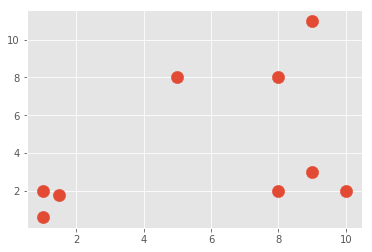

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [36]:
row_count=X.shape[0]
row_count

9

In [37]:
import math
def Euclidean_distance(feature,centroid):
    return np.sqrt(np.sum(np.square(feature-centroid)))

In [38]:
point_distances = [[0.0 for x in range(row_count)] for y in range(row_count)]
for i in range(0, row_count):
    j = i
    while j < row_count:
        point_distances[i][j] = Euclidean_distance(X[i], X[j])
        point_distances[j][i] = point_distances[i][j]
        j = j+1

In [39]:
np.array(point_distances)

array([[ 0.        ,  0.53851648,  7.21110255,  9.21954446,  1.4       ,
        12.04159458,  7.        ,  9.        ,  8.06225775],
       [ 0.53851648,  0.        ,  7.119691  ,  8.98276127,  1.3       ,
        11.86970935,  6.5030762 ,  8.50235262,  7.59539334],
       [ 7.21110255,  7.119691  ,  0.        ,  3.        ,  8.41189634,
         5.        ,  6.70820393,  7.81024968,  6.40312424],
       [ 9.21954446,  8.98276127,  3.        ,  0.        , 10.18626526,
         3.16227766,  6.        ,  6.32455532,  5.09901951],
       [ 1.4       ,  1.3       ,  8.41189634, 10.18626526,  0.        ,
        13.12097557,  7.13862732,  9.10823803,  8.35224521],
       [12.04159458, 11.86970935,  5.        ,  3.16227766, 13.12097557,
         0.        ,  9.05538514,  9.05538514,  8.        ],
       [ 7.        ,  6.5030762 ,  6.70820393,  6.        ,  7.13862732,
         9.05538514,  0.        ,  2.        ,  1.41421356],
       [ 9.        ,  8.50235262,  7.81024968,  6.32455532,  9

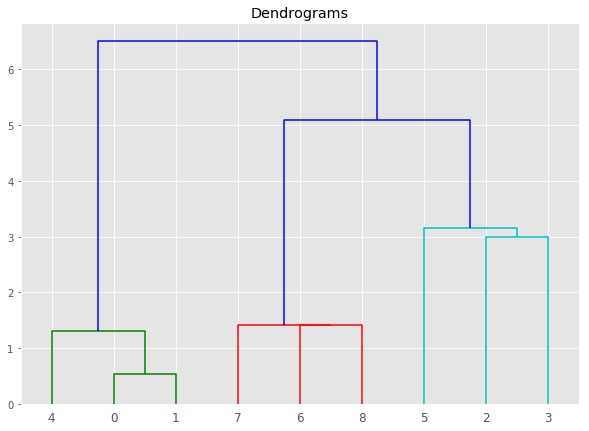

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X))

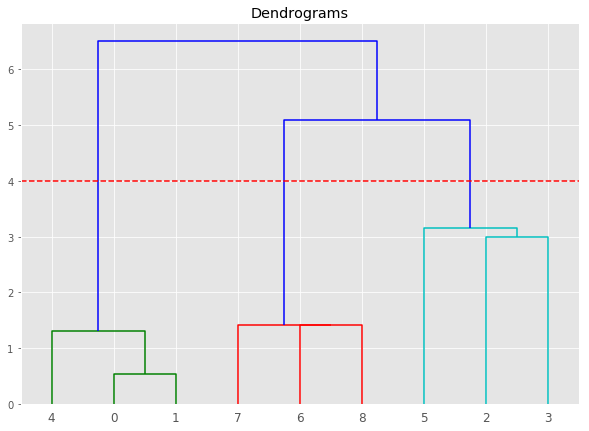

In [41]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X))
plt.axhline(y=4, color='r', linestyle='--')

In [42]:
cluster_list = list()
for i in range(0, row_count):
    newInnerList = list()
    cluster_list.append([newInnerList, 1]) #1 represents the number of elements in cluster
    cluster_list[i][0].append([X[i], i])

In [43]:
cluster_list ,len(cluster_list)

([[[[array([1., 2.]), 0]], 1],
  [[[array([1.5, 1.8]), 1]], 1],
  [[[array([5., 8.]), 2]], 1],
  [[[array([8., 8.]), 3]], 1],
  [[[array([1. , 0.6]), 4]], 1],
  [[[array([ 9., 11.]), 5]], 1],
  [[[array([8., 2.]), 6]], 1],
  [[[array([10.,  2.]), 7]], 1],
  [[[array([9., 3.]), 8]], 1]],
 9)

In [44]:
cluster_distances =  [[0.0 for x in range(len(cluster_list))] for y in range(len(cluster_list))]

In [45]:
cluster_distances

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [46]:
distances_minheap = []

In [47]:
from heapq import heappush, heappop
for i in range(0, len(cluster_list)):
    j = i + 1
    while j < len(cluster_list):
        for k in range(0, len(cluster_list[i][0])):
            for l in range(0, len(cluster_list[j][0])):
                cluster_distances[i][j] = cluster_distances[i][j] + point_distances[cluster_list[i][0][k][1]][cluster_list[j][0][l][1]]
        cluster_distances[i][j] = cluster_distances[i][j] * (1.0/(cluster_list[i][1] * cluster_list[j][1]))
        cluster_distances[j][i] = cluster_distances[i][j]
        heappush(distances_minheap, (cluster_distances[i][j], i , j, cluster_list[i][1], cluster_list[j][1]))
        j = j + 1

In [48]:
cluster_list[0][1] , cluster_list[1][1]

(1, 1)

In [49]:
np.array(distances_minheap) ,np.array(distances_minheap).shape

(array([[ 0.53851648,  0.        ,  1.        ,  1.        ,  1.        ],
        [ 1.3       ,  1.        ,  4.        ,  1.        ,  1.        ],
        [ 5.09901951,  3.        ,  8.        ,  1.        ,  1.        ],
        [ 1.41421356,  6.        ,  8.        ,  1.        ,  1.        ],
        [ 1.4       ,  0.        ,  4.        ,  1.        ,  1.        ],
        [ 6.        ,  3.        ,  6.        ,  1.        ,  1.        ],
        [ 7.13862732,  4.        ,  6.        ,  1.        ,  1.        ],
        [ 2.        ,  6.        ,  7.        ,  1.        ,  1.        ],
        [ 1.41421356,  7.        ,  8.        ,  1.        ,  1.        ],
        [ 6.40312424,  2.        ,  8.        ,  1.        ,  1.        ],
        [ 3.16227766,  3.        ,  5.        ,  1.        ,  1.        ],
        [ 6.5030762 ,  1.        ,  6.        ,  1.        ,  1.        ],
        [ 6.32455532,  3.        ,  7.        ,  1.        ,  1.        ],
        [ 7.59539334,  1.

In [50]:
np.array(cluster_distances)

array([[ 0.        ,  0.53851648,  7.21110255,  9.21954446,  1.4       ,
        12.04159458,  7.        ,  9.        ,  8.06225775],
       [ 0.53851648,  0.        ,  7.119691  ,  8.98276127,  1.3       ,
        11.86970935,  6.5030762 ,  8.50235262,  7.59539334],
       [ 7.21110255,  7.119691  ,  0.        ,  3.        ,  8.41189634,
         5.        ,  6.70820393,  7.81024968,  6.40312424],
       [ 9.21954446,  8.98276127,  3.        ,  0.        , 10.18626526,
         3.16227766,  6.        ,  6.32455532,  5.09901951],
       [ 1.4       ,  1.3       ,  8.41189634, 10.18626526,  0.        ,
        13.12097557,  7.13862732,  9.10823803,  8.35224521],
       [12.04159458, 11.86970935,  5.        ,  3.16227766, 13.12097557,
         0.        ,  9.05538514,  9.05538514,  8.        ],
       [ 7.        ,  6.5030762 ,  6.70820393,  6.        ,  7.13862732,
         9.05538514,  0.        ,  2.        ,  1.41421356],
       [ 9.        ,  8.50235262,  7.81024968,  6.32455532,  9

In [51]:
ignore_cluster_list = []
totalClusterCount = row_count
toMerge = None
k_value=3

In [52]:
distances_minheap[0]

(0.5385164807134504, 0, 1, 1, 1)

In [53]:
cluster_list[0]

[[[array([1., 2.]), 0]], 1]

In [61]:
cluster_list[0][1] , cluster_list[1][0] , len(cluster_list[1][0])

(1, [[array([1.5, 1.8]), 1]], 1)

In [62]:
while totalClusterCount > k_value:
    toMerge = heappop(distances_minheap)
    while toMerge[1] in ignore_cluster_list or toMerge[2] in ignore_cluster_list or cluster_list[toMerge[1]][1] != toMerge[3] or cluster_list[toMerge[2]][1] != toMerge[4]:
        toMerge = heappop(distances_minheap)

    cluster_list[toMerge[1]][1] = cluster_list[toMerge[1]][1] + cluster_list[toMerge[2]][1] 
    
    for point in cluster_list[toMerge[2]][0]:
        cluster_list[toMerge[1]][0].append(point)
        
    ignore_cluster_list.append(toMerge[2])
    totalClusterCount = totalClusterCount - 1

    for i in range(0, len(cluster_list)):
        if i == toMerge[1] or i in ignore_cluster_list:
            continue
        cluster_distances[toMerge[1]][i] = 0
        for j in range(0, len(cluster_list[toMerge[1]][0])):
            for k in range(0, len(cluster_list[i][0])):
                cluster_distances[toMerge[1]][i] = cluster_distances[toMerge[1]][i] + point_distances[cluster_list[toMerge[1]][0][j][1]][cluster_list[i][0][k][1]]
        cluster_distances[toMerge[1]][i] = cluster_distances[toMerge[1]][i] * (1.0/(float(cluster_list[toMerge[1]][1]) * float(cluster_list[i][1])))
        cluster_distances[i][toMerge[1]] = cluster_distances[toMerge[1]][i]

        heap_tuple =  (cluster_distances[toMerge[1]][i], toMerge[1] , i, cluster_list[toMerge[1]][1], cluster_list[i][1])
        heappush(distances_minheap, heap_tuple)

In [63]:
np.array(cluster_distances)

array([[ 0.        ,  0.53851648,  9.79594893,  9.462857  ,  1.35      ,
        12.34409317,  7.91802116,  8.87019688,  8.00329877],
       [ 0.53851648,  0.        ,  7.119691  ,  8.98276127,  1.3       ,
        11.86970935,  6.5030762 ,  8.50235262,  7.59539334],
       [ 9.79594893,  7.119691  ,  0.        ,  3.        ,  8.41189634,
         4.08113883,  7.16176922,  7.81024968,  6.40312424],
       [ 9.462857  ,  8.98276127,  3.        ,  0.        , 10.18626526,
         3.16227766,  5.80785828,  6.32455532,  5.09901951],
       [ 1.35      ,  1.3       ,  8.41189634, 10.18626526,  0.        ,
        13.12097557,  7.13862732,  9.10823803,  8.35224521],
       [12.34409317, 11.86970935,  4.08113883,  3.16227766, 13.12097557,
         0.        ,  8.70359009,  9.05538514,  8.        ],
       [ 7.91802116,  6.5030762 ,  7.16176922,  5.80785828,  7.13862732,
         8.70359009,  0.        ,  1.70710678,  1.41421356],
       [ 8.87019688,  8.50235262,  7.81024968,  6.32455532,  9

In [64]:
cluster_list

[[[[array([1., 2.]), 0], [array([1.5, 1.8]), 1], [array([1. , 0.6]), 4]], 3],
 [[[array([1.5, 1.8]), 1]], 1],
 [[[array([5., 8.]), 2], [array([8., 8.]), 3], [array([ 9., 11.]), 5]], 3],
 [[[array([8., 8.]), 3]], 1],
 [[[array([1. , 0.6]), 4]], 1],
 [[[array([ 9., 11.]), 5]], 1],
 [[[array([8., 2.]), 6], [array([9., 3.]), 8], [array([10.,  2.]), 7]], 3],
 [[[array([10.,  2.]), 7]], 1],
 [[[array([9., 3.]), 8]], 1]]

In [66]:
np.array(distances_minheap)

array([[ 5.        ,  2.        ,  5.        ,  1.        ,  1.        ],
       [ 5.54950976,  6.        ,  3.        ,  2.        ,  1.        ],
       [ 5.09901951,  3.        ,  8.        ,  1.        ,  1.        ],
       [ 6.70820393,  2.        ,  6.        ,  1.        ,  1.        ],
       [ 6.40312424,  2.        ,  8.        ,  1.        ,  1.        ],
       [ 5.80785828,  6.        ,  3.        ,  3.        ,  1.        ],
       [ 7.13862732,  4.        ,  6.        ,  1.        ,  1.        ],
       [ 7.119691  ,  1.        ,  2.        ,  1.        ,  1.        ],
       [ 7.        ,  0.        ,  6.        ,  1.        ,  1.        ],
       [ 6.7515381 ,  0.        ,  6.        ,  2.        ,  1.        ],
       [ 6.55566408,  6.        ,  2.        ,  2.        ,  1.        ],
       [ 6.        ,  3.        ,  6.        ,  1.        ,  1.        ],
       [ 6.32455532,  3.        ,  7.        ,  1.        ,  1.        ],
       [ 7.59539334,  1.        ,  8. 

In [67]:
col_count=X.shape[1]
col_count

2

In [68]:
def add_points(point_1, point_2):
    for i in range(0, len(point_1)):
        point_1[i] = float(point_1[i]) + float(point_2[i])
    return point_1

In [69]:
centroid_points = [[0.0 for x in range(col_count)] for y in range(k_value)]
centroid_index = 0
for i in range(0, row_count):
    if i in ignore_cluster_list:
        continue
    else:
        for j in range(0, len(cluster_list[i][0])):
            centroid_points[centroid_index] = add_points(centroid_points[centroid_index], cluster_list[i][0][j][0])

        for j in range(0, len(centroid_points[centroid_index])):
            centroid_points[centroid_index][j] = centroid_points[centroid_index][j] / float(cluster_list[i][1])
        centroid_index = centroid_index + 1

In [70]:
centroid_points

[[1.1666666666666667, 1.4666666666666666],
 [7.333333333333333, 9.0],
 [9.0, 2.3333333333333335]]

In [71]:
labels=[]
for point in X:
    dist=[]
    for cluster in centroid_points:
        dist.append(Euclidean_distance(point,cluster))
    labels.append(dist.index(min(dist)))
labels

[0, 0, 1, 1, 0, 1, 2, 2, 2]

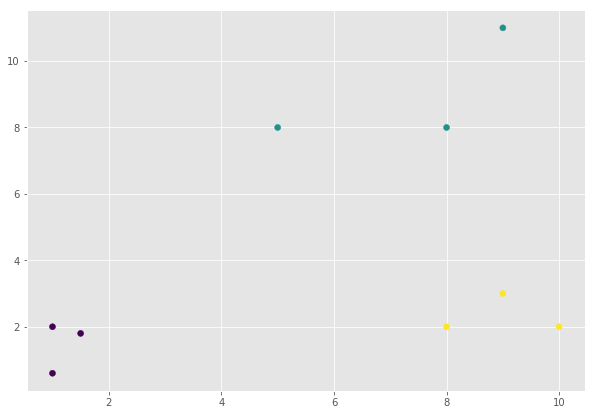

In [72]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0],X[:,1], c=labels) 